SMOTE SINIFLANDIRMA PROBLEMLERİ İÇİN YAPILIR BUNDA BELKİ LOG DÖNÜŞÜMÜ YAPABİLİRİZ

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install catboost


In [ ]:
# Importing
##################################

import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/boosting acunm/Hitters.csv")
df.head()



,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [ ]:
df.shape


(322, 20)

In [ ]:
display(df.isnull().sum())

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


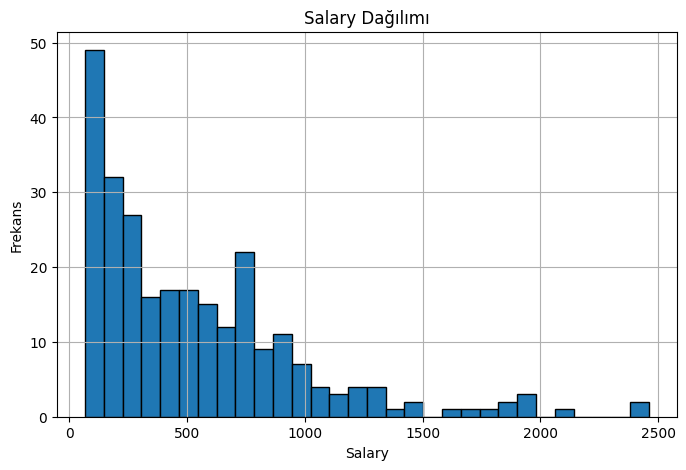

In [ ]:
import matplotlib.pyplot as plt

# Salary dağılım grafiği
plt.figure(figsize=(8, 5))
plt.hist(df["Salary"], bins=30, edgecolor='black')
plt.title("Salary Dağılımı")
plt.xlabel("Salary")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()


maaşlar düşük değerde yığılmış

In [ ]:
# Salary sütunundaki eksik değerleri medyan ile doldur
median_salary = df["Salary"].median()
df["Salary"] = df["Salary"].fillna(median_salary)


df.isnull().sum()


,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


In [ ]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,425.0,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


kategorikleri encode edelim


In [ ]:
# 2. Adım: One-Hot Encoding (kategorik değişkenler)
categorical_cols = ["League", "Division", "NewLeague"]

# One-hot encoding uygulanıyor
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Yeni veri setini görelim
df.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,425.0,False,False,False
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,True,True,True
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,False,True,False
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,True,False,True
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,True,False,True


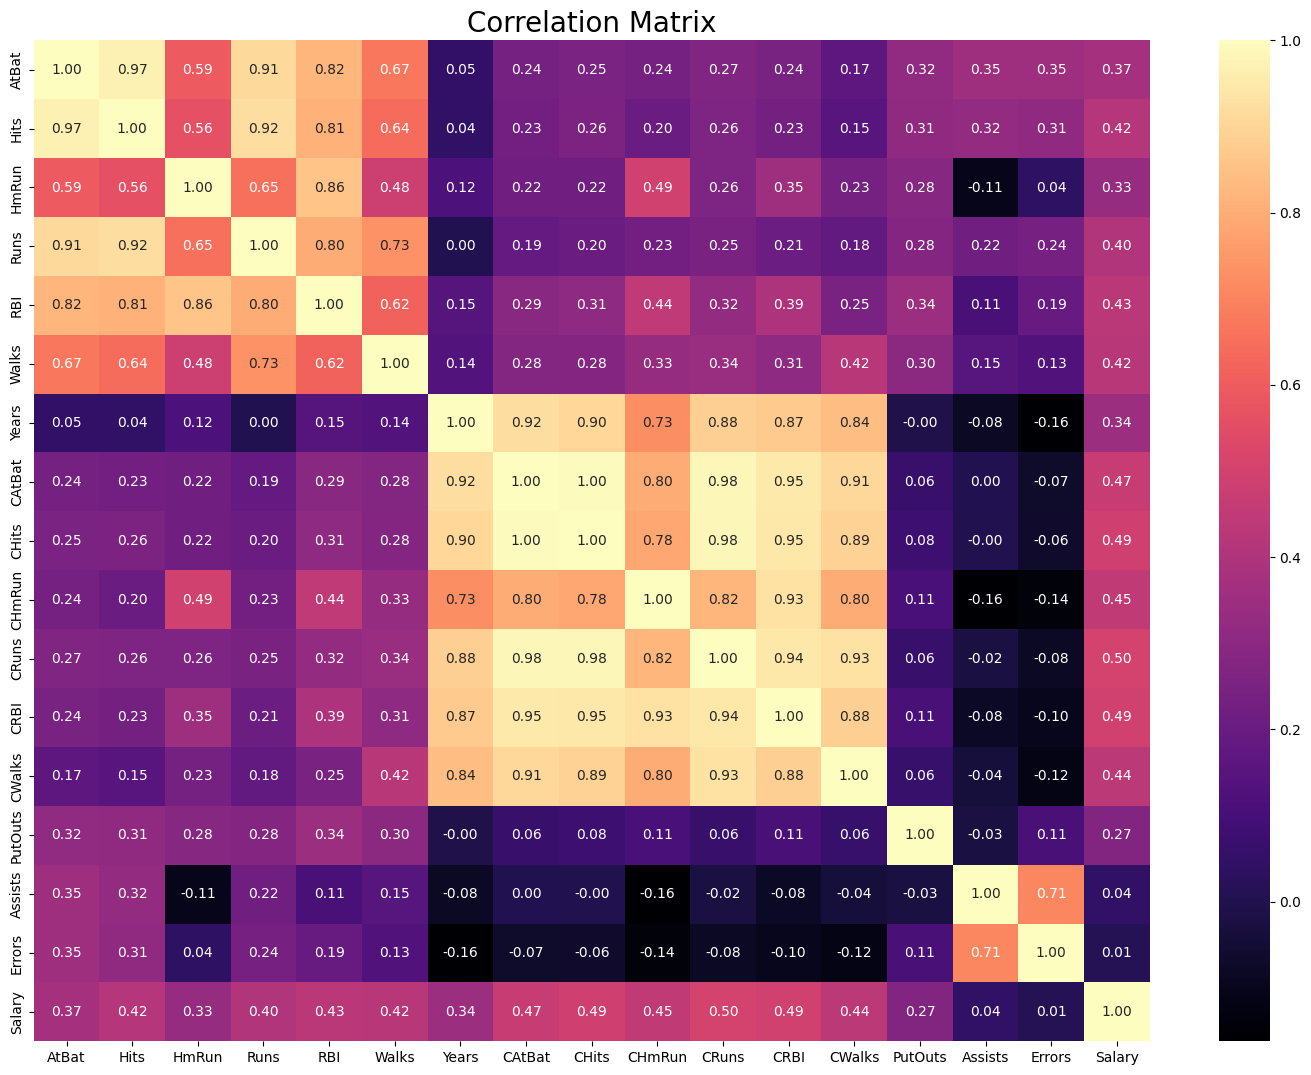

Maaş Korelasyonu (Yüksekten Düşüğe):

Salary     1.000000
CRuns      0.502752
CRBI       0.494533
CHits      0.490008
CAtBat     0.465903
CHmRun     0.448738
CWalks     0.435158
RBI        0.428745
Walks      0.424553
Hits       0.415332
Runs       0.402887
AtBat      0.373421
Years      0.344336
HmRun      0.331530
PutOuts    0.270629
Assists    0.043425
Errors     0.014216
dtype: float64


In [ ]:
# Sadece sayısal değişkenleri seç
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Korelasyon matrisini hesapla
corr_matrix = df[num_cols].corr()

# Korelasyon matrisi ısı haritası
plt.figure(figsize=(18, 13))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="magma")
plt.title("Correlation Matrix", fontsize=20)
plt.show()

salary_corr = df[num_cols].corrwith(df["Salary"]).sort_values(ascending=False)

# Sonuçları yazdır
print("Maaş Korelasyonu (Yüksekten Düşüğe):\n")
print(salary_corr)


🔎 AtBat sütununda aykırı değer sayısı: 0


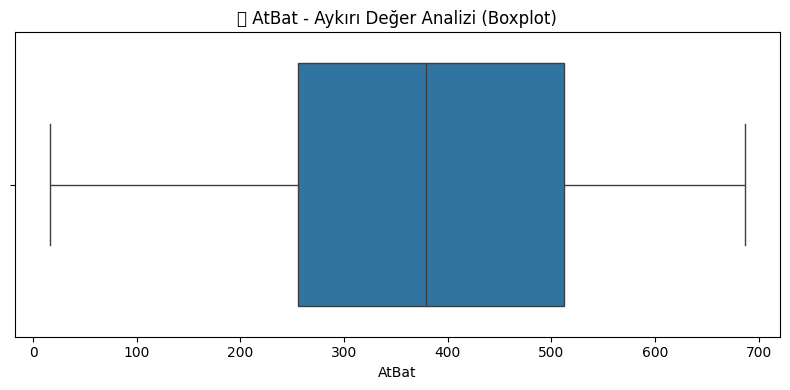

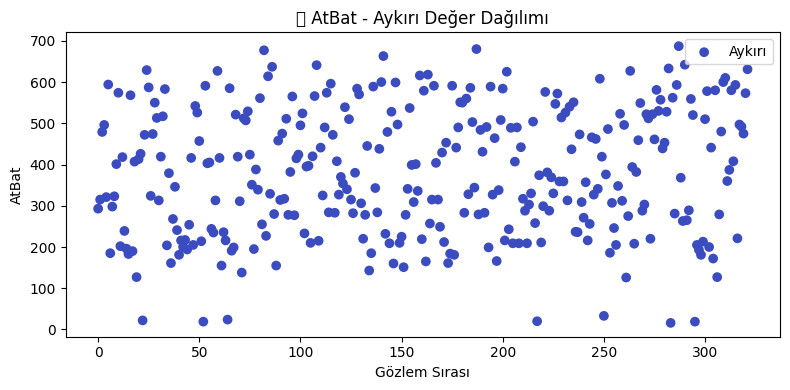

🔎 Hits sütununda aykırı değer sayısı: 0


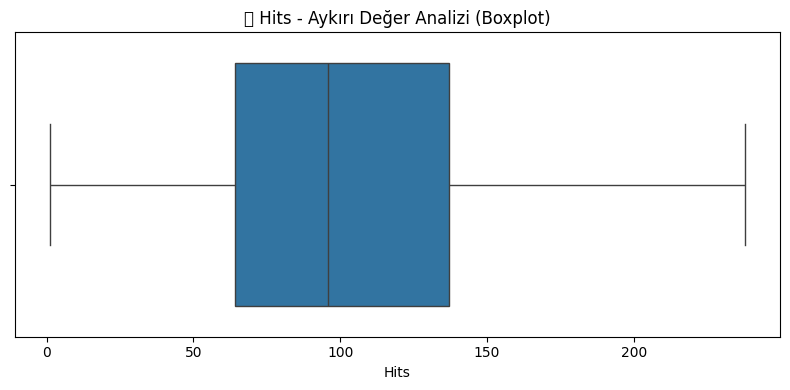

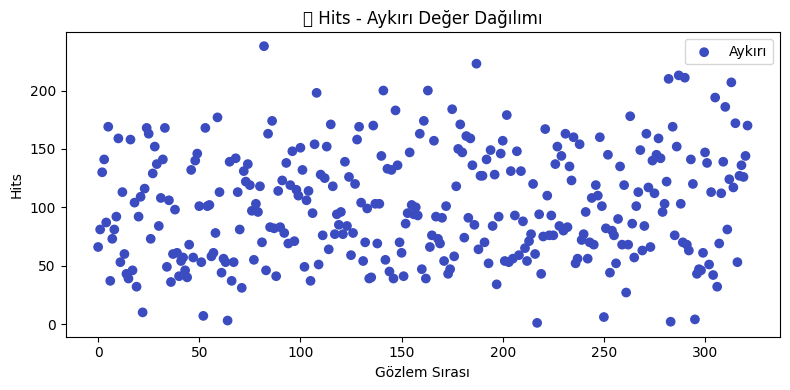

🔎 HmRun sütununda aykırı değer sayısı: 1


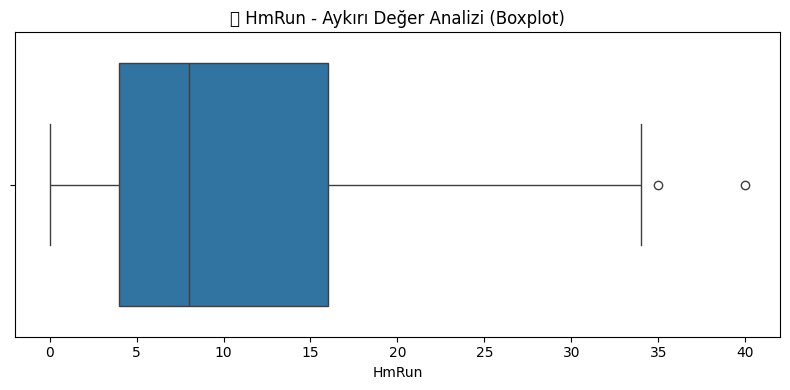

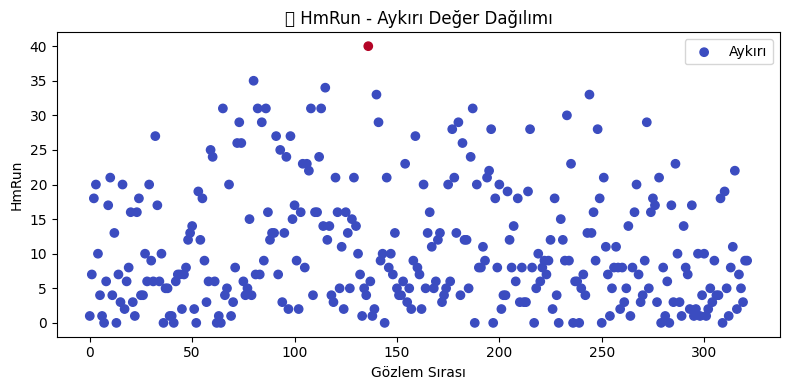

🔎 Runs sütununda aykırı değer sayısı: 1


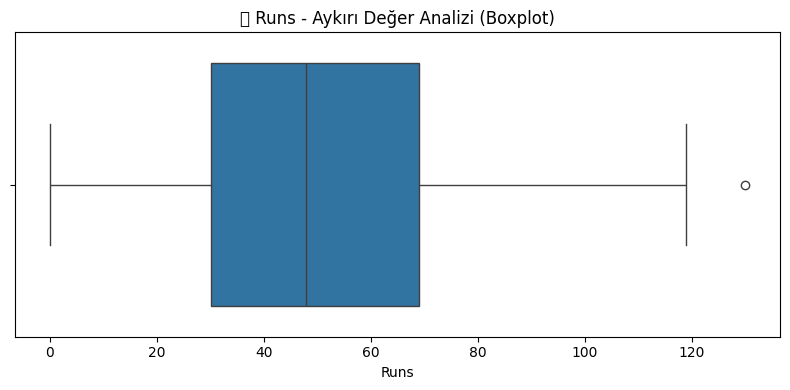

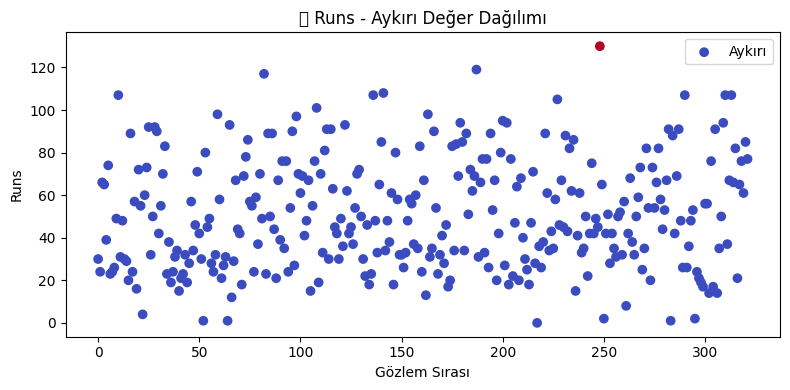

🔎 RBI sütununda aykırı değer sayısı: 0


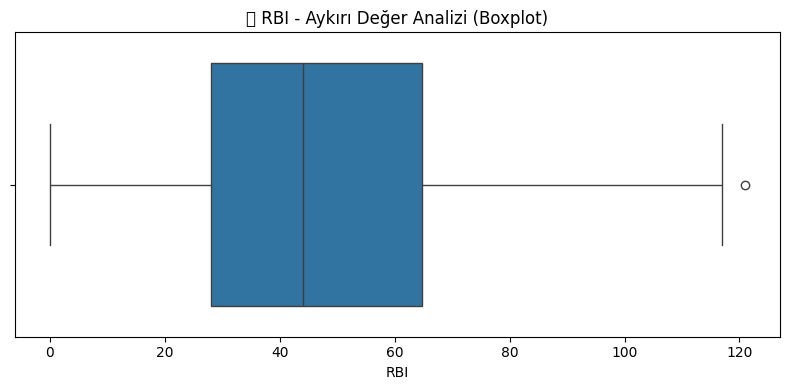

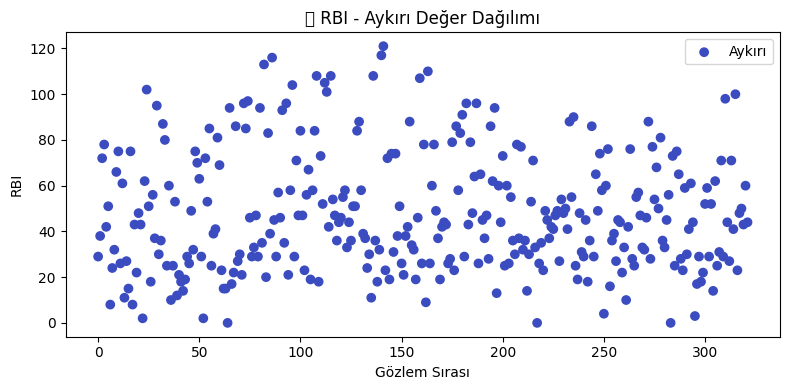

🔎 Walks sütununda aykırı değer sayısı: 1


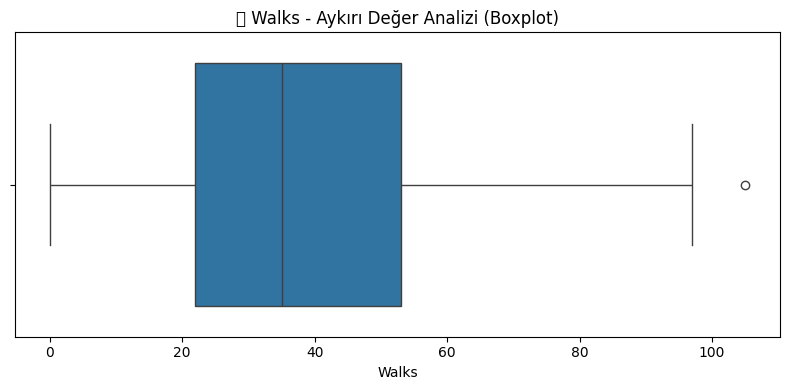

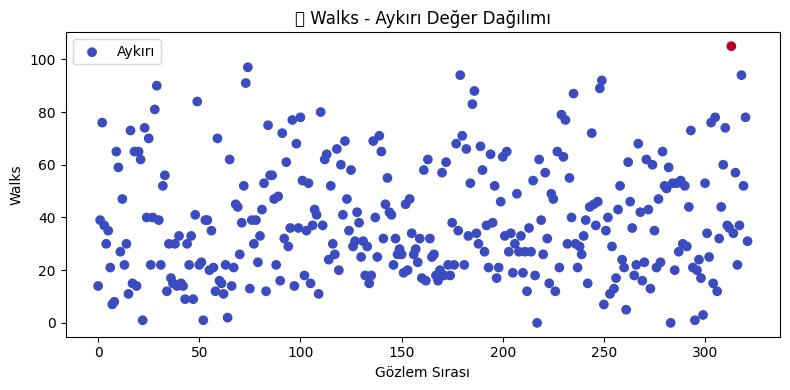

🔎 Years sütununda aykırı değer sayısı: 2


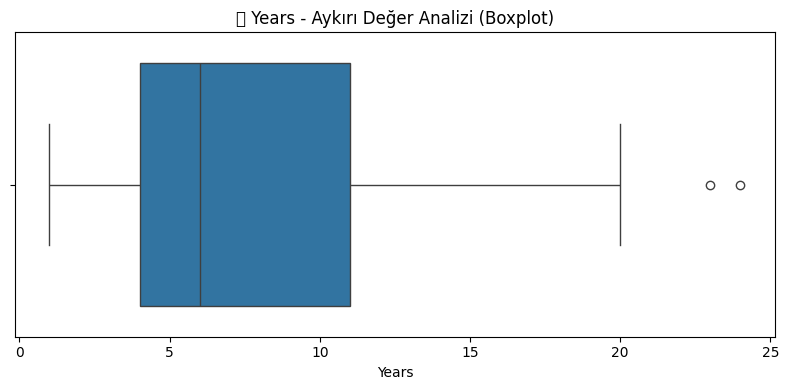

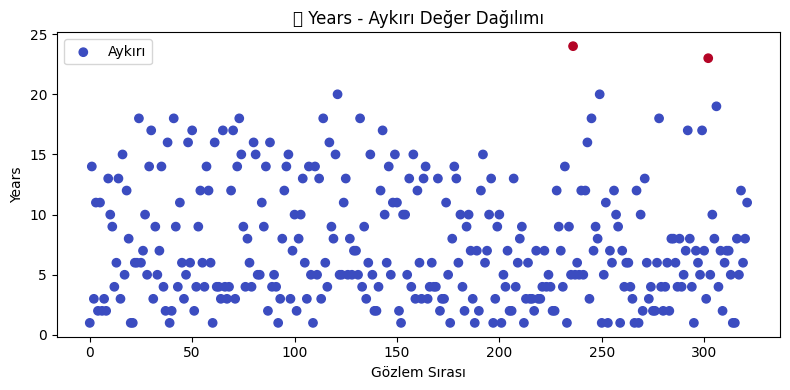

🔎 CAtBat sütununda aykırı değer sayısı: 2


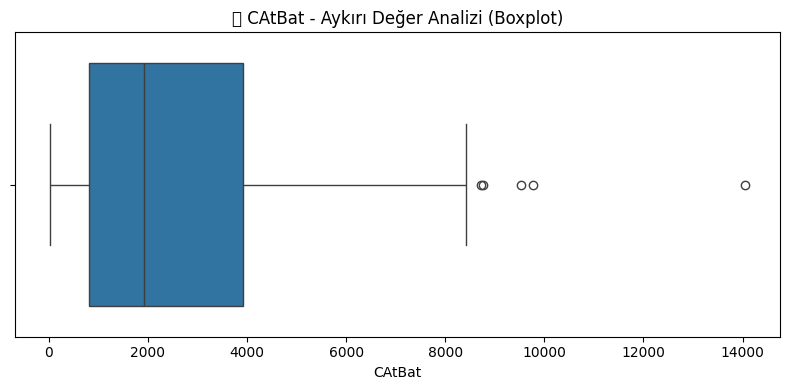

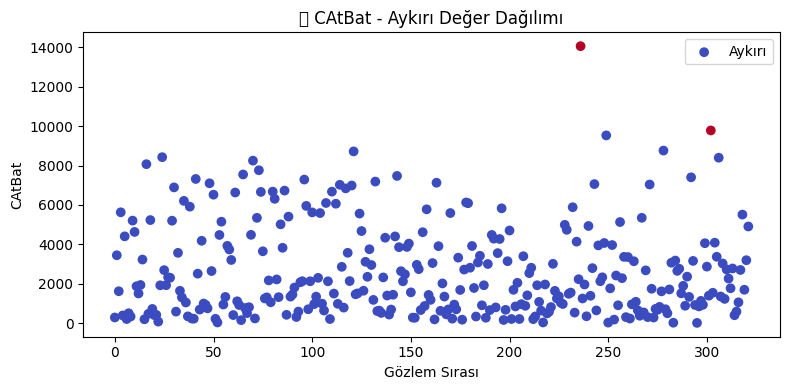

🔎 CHits sütununda aykırı değer sayısı: 2


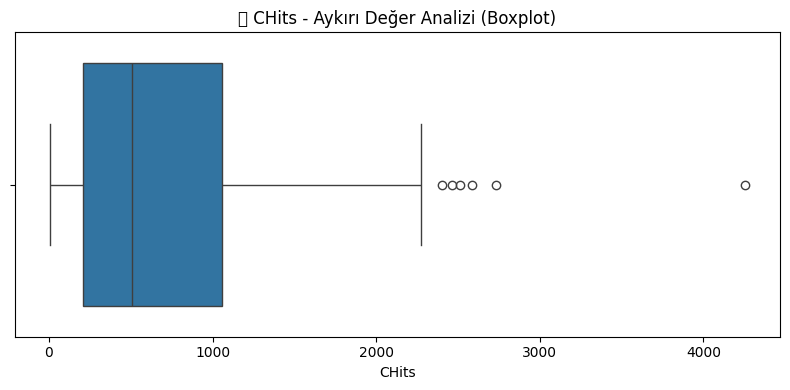

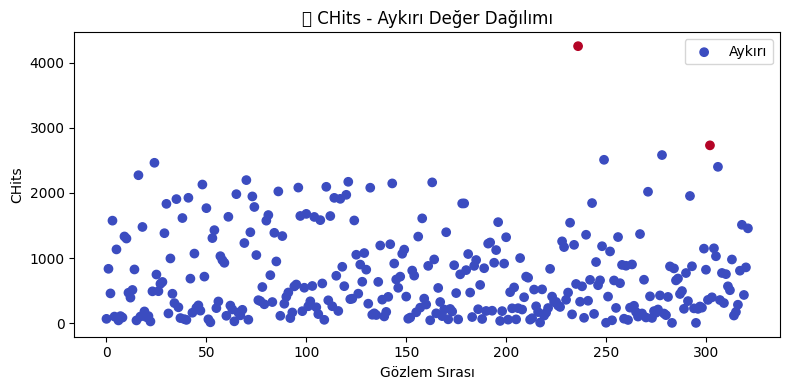

🔎 CHmRun sütununda aykırı değer sayısı: 7


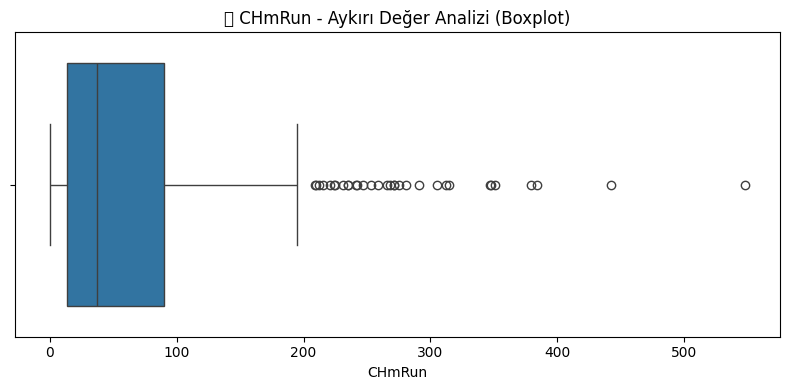

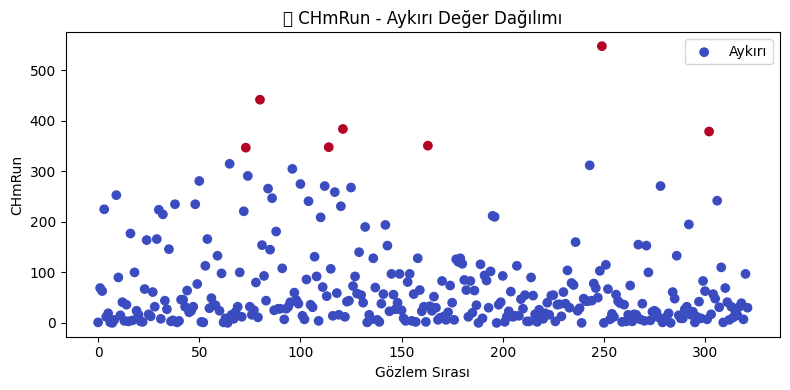

🔎 CRuns sütununda aykırı değer sayısı: 2


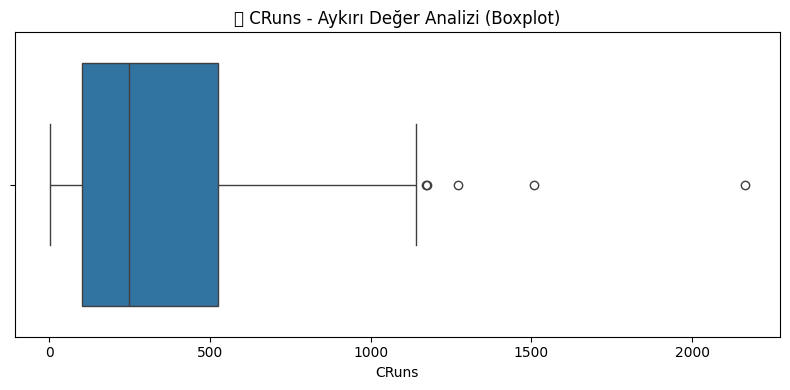

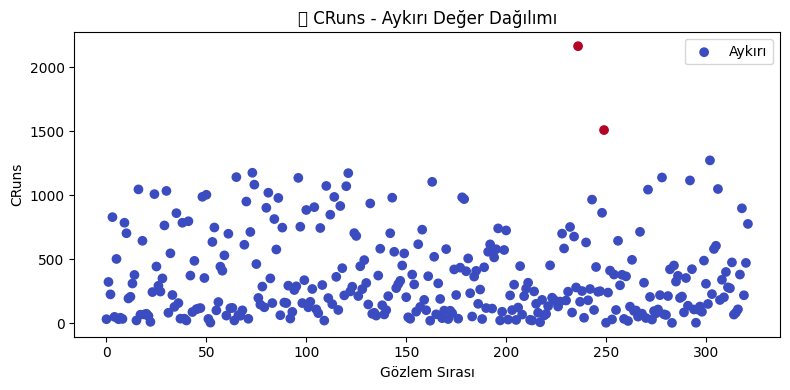

🔎 CRBI sütununda aykırı değer sayısı: 3


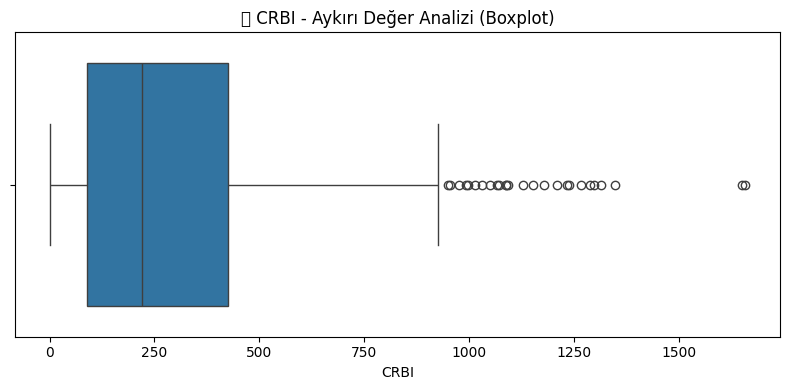

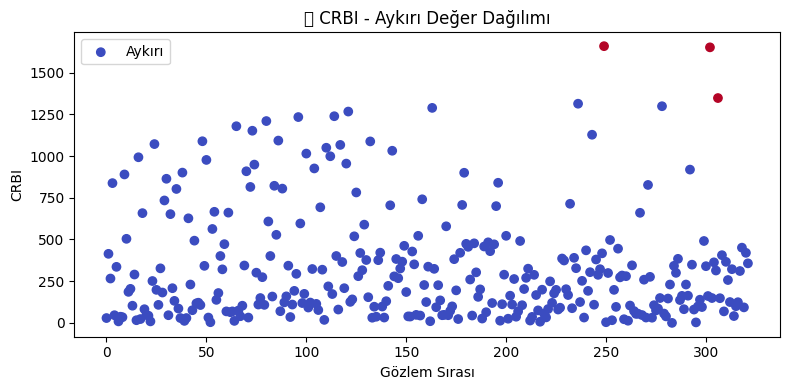

🔎 CWalks sütununda aykırı değer sayısı: 5


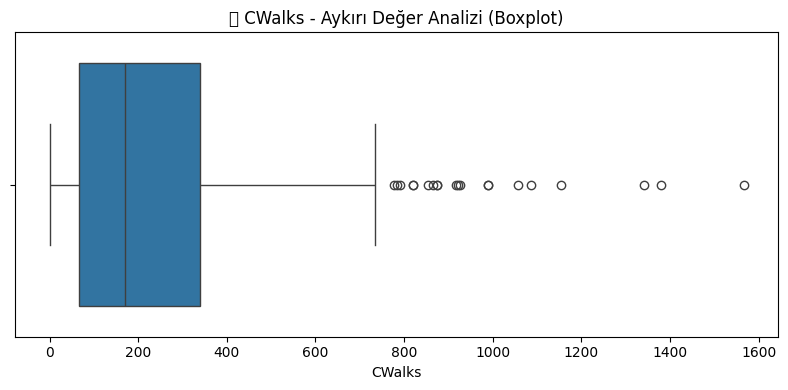

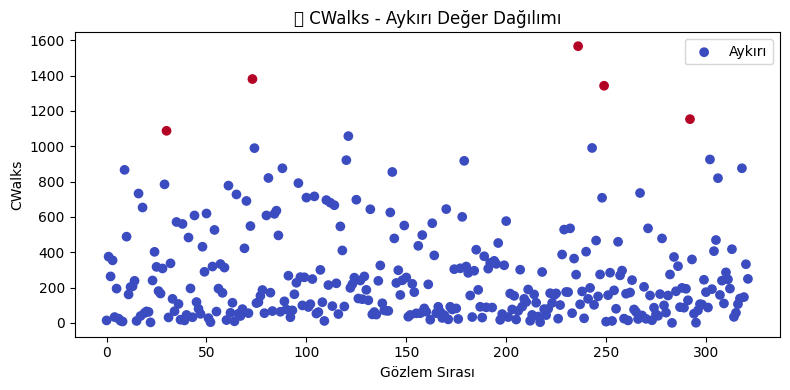

🔎 PutOuts sütununda aykırı değer sayısı: 13


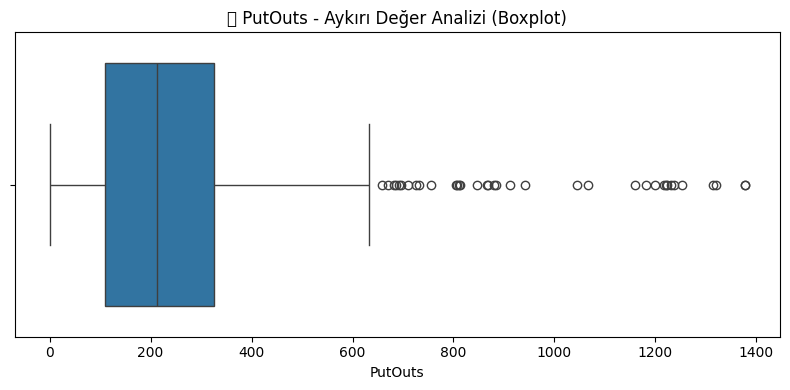

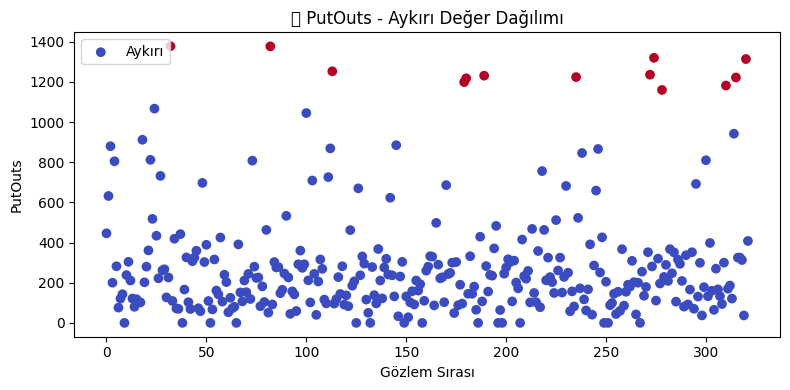

🔎 Assists sütununda aykırı değer sayısı: 0


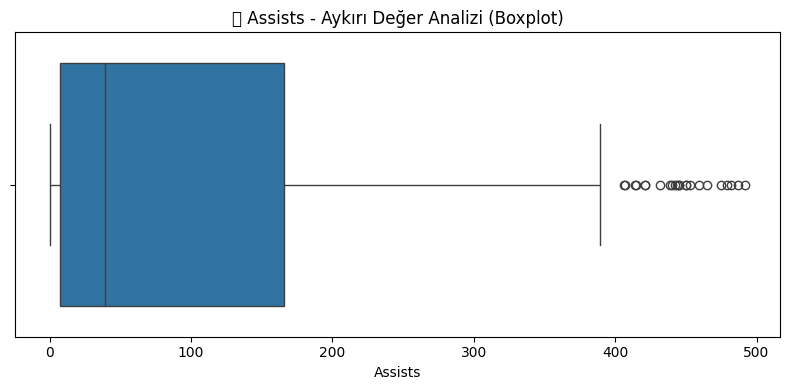

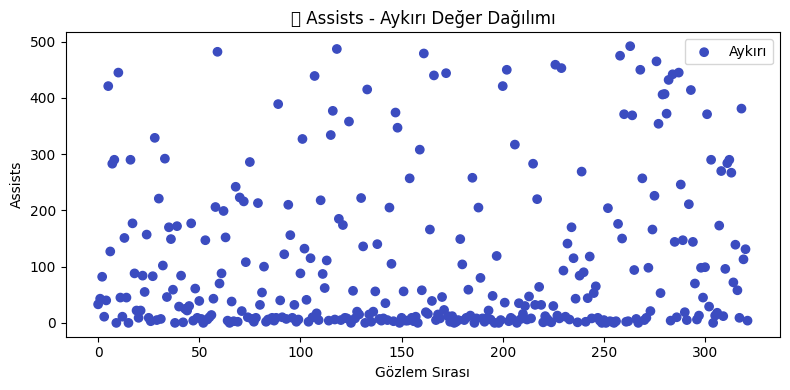

🔎 Errors sütununda aykırı değer sayısı: 2


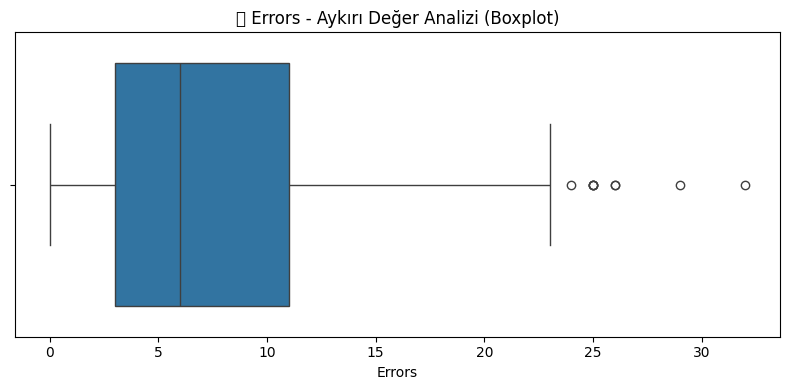

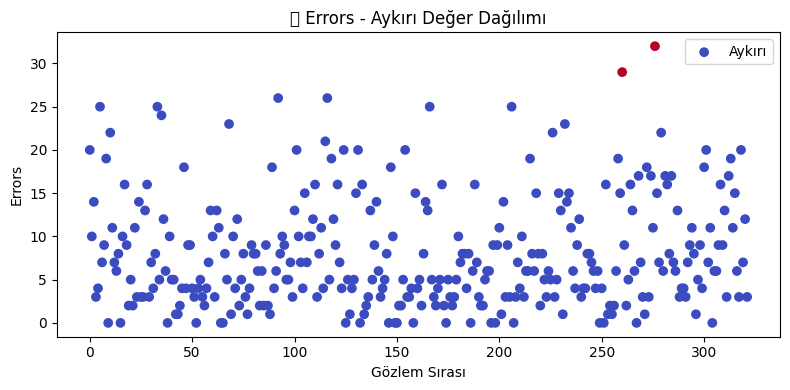

🔎 Salary sütununda aykırı değer sayısı: 9


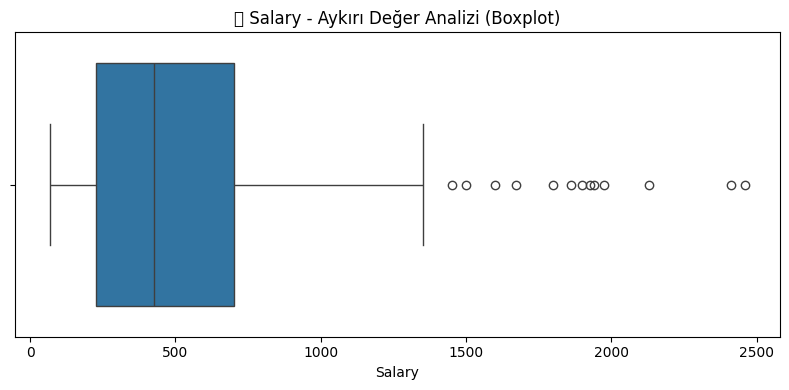

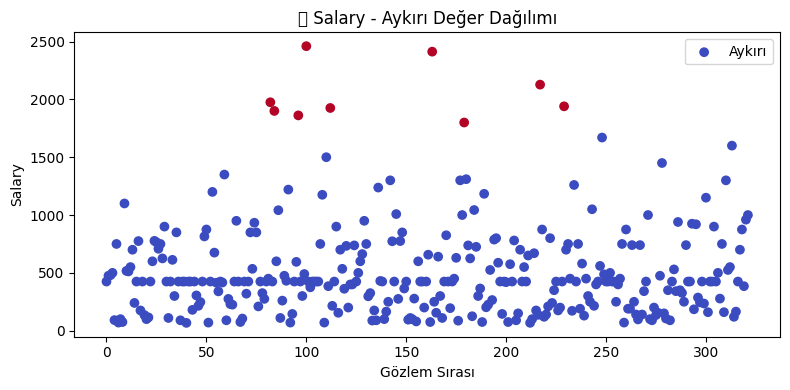

In [ ]:
### AYKIRI DEĞER ANALİZİ (Tüm Sayısal Özellikler) ###
from sklearn.model_selection import train_test_split
from scipy import stats

numerical_cols = df.select_dtypes(include=np.number).columns
threshold = 3

for col in numerical_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outlier_mask = z_scores > threshold
    outlier_count = outlier_mask.sum()

    print(f"🔎 {col} sütununda aykırı değer sayısı: {outlier_count}")

    # Boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"📦 {col} - Aykırı Değer Analizi (Boxplot)")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

    # Scatter plot
    plt.figure(figsize=(8, 4))
    plt.scatter(range(len(df)), df[col], c=outlier_mask, cmap='coolwarm', label='Aykırı')
    plt.title(f"📌 {col} - Aykırı Değer Dağılımı")
    plt.xlabel('Gözlem Sırası')
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()


### LINEER MODELLER İÇİN AYKIRI BASKILAMA (WINSORIZATION) ###
df_clipped = df.copy()

for col in numerical_cols:
    lower = df_clipped[col].quantile(0.01)
    upper = df_clipped[col].quantile(0.99)
    df_clipped[col] = np.clip(df_clipped[col], lower, upper)

# Yeni X, y oluştur
X_clip = df_clipped.drop(columns=["Salary"])
y_clip = df_clipped["Salary"]

# Eğitim-test ayır ve ölçekle
X_train_clip, X_test_clip, y_train_clip, y_test_clip = train_test_split(X_clip, y_clip, test_size=0.2, random_state=42)

scaler_clip = StandardScaler()
X_train_clip_scaled = scaler_clip.fit_transform(X_train_clip)
X_test_clip_scaled = scaler_clip.transform(X_test_clip)
X_clip_scaled = scaler_clip.fit_transform(X_clip)  # CV için


In [ ]:
from sklearn.preprocessing import StandardScaler



# Salary dışındaki tüm sütunlar feature
X = df.drop("Salary", axis=1)
y = df["Salary"]

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((257, 19), (65, 19))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    int64  
 1   Hits         322 non-null    int64  
 2   HmRun        322 non-null    int64  
 3   Runs         322 non-null    int64  
 4   RBI          322 non-null    int64  
 5   Walks        322 non-null    int64  
 6   Years        322 non-null    int64  
 7   CAtBat       322 non-null    int64  
 8   CHits        322 non-null    int64  
 9   CHmRun       322 non-null    int64  
 10  CRuns        322 non-null    int64  
 11  CRBI         322 non-null    int64  
 12  CWalks       322 non-null    int64  
 13  PutOuts      322 non-null    int64  
 14  Assists      322 non-null    int64  
 15  Errors       322 non-null    int64  
 16  Salary       322 non-null    float64
 17  League_N     322 non-null    bool   
 18  Division_W   322 non-null    bool   
 19  NewLeagu

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
...

### LINEAR REGRESSION (Aykırı Değer Baskılanmış Veri) ###
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate

# Model oluşturma
lr_model = LinearRegression()

# Modeli eğitme
lr_model.fit(X_train_clip_scaled, y_train_clip)

# Test seti ile tahmin yapma
y_pred_clip = lr_model.predict(X_test_clip_scaled)

# Performans değerlendirme
mae_clip = mean_absolute_error(y_test_clip, y_pred_clip)
mse_clip = mean_squared_error(y_test_clip, y_pred_clip)
r2_clip = r2_score(y_test_clip, y_pred_clip)

# 5-Fold Cross-Validation
cv_results_clip = cross_validate(
    lr_model,
    X_clip_scaled,
    y_clip,
    cv=5,
    scoring=("r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"),
    return_train_score=True
)

# Sonuçları yazdıralım
print("\n📘 Linear Regression (Baskılanmış Veri)")
print(f"MAE: {mae_clip:.4f}")
print(f"MSE: {mse_clip:.2f}")
print(f"R²: {r2_clip:.4f}")

# Ortalama sonuçları yazdır
print("🔁 Cross-Validation Sonuçları (Train seti üzerinde):")
print(f"R² ortalama       : {np.mean(cv_results_clip['test_r2']):.4f}")
print(f"MAE ortalama      : {-np.mean(cv_results_clip['test_neg_mean_absolute_error']):.4f}")
print(f"RMSE ortalama     : {-np.mean(cv_results_clip['test_neg_root_mean_squared_error']):.4f}")



📘 Linear Regression (Baskılanmış Veri)
MAE: 233.1151
MSE: 122555.00
R²: 0.3612
🔁 Cross-Validation Sonuçları (Train seti üzerinde):
R² ortalama       : 0.2855
MAE ortalama      : 235.2025
RMSE ortalama     : 316.5288


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, r2_score


...

### RIDGE REGRESSION (Baskılanmış Veri) ###
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Ridge parametre aralığı
ridge_params = {'alpha': np.logspace(-3, 3, 50)}

# 2. Ridge modeli ve GridSearchCV
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, scoring='r2', cv=5)
ridge_grid.fit(X_train_clip_scaled, y_train_clip)

# 3. En iyi modeli al
best_ridge = ridge_grid.best_estimator_
ridge_best_alpha = ridge_grid.best_params_['alpha']

# 4. Test seti üzerinde tahmin
y_pred_ridge = best_ridge.predict(X_test_clip_scaled)

# 5. Performans metrikleri
mse_ridge = mean_squared_error(y_test_clip, y_pred_ridge)
r2_ridge = r2_score(y_test_clip, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
ridge_coefficients = best_ridge.coef_

# 6. Sonuçları yazdır
print("\n📘 Ridge Regression (Baskılanmış Veri)")
print("📌 Ridge Katsayıları:")
print(ridge_coefficients)
print(f"✅ Ridge Modeli (En iyi Alpha: {ridge_best_alpha:.4f}):")
print(f"📉 Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"📈 R² Skoru: {r2_ridge:.4f}")
print(f"📏 RMSE: {rmse_ridge:.4f}")

# 7. CROSS-VALIDATION
cv_results = cross_validate(
    best_ridge,
    X_clip_scaled,
    y_clip,
    cv=5,
    scoring=('neg_mean_squared_error', 'r2'),
    return_train_score=True
)

rmse_scores = np.sqrt(-cv_results['test_neg_mean_squared_error'])
r2_scores = cv_results['test_r2']

print("\n🔁 Cross-Validation Sonuçları (Train seti üzerinde):")
print(f"Ortalama RMSE: {rmse_scores.mean():.4f}")
print(f"Ortalama R² : {r2_scores.mean():.4f}")


📘 Ridge Regression (Baskılanmış Veri)
📌 Ridge Katsayıları:
[-261.54598925  223.01162573   18.14124417   -9.57013715    2.0350237
   92.08572282  -77.58331513 -243.23037186  223.88871807   34.70237117
  278.35207695  118.46725414 -163.98373473   47.15660159   35.76868204
  -19.39671731   29.31717773  -44.3634368   -11.15668199]
✅ Ridge Modeli (En iyi Alpha: 1.1514):
📉 Mean Squared Error (MSE): 119540.4719
📈 R² Skoru: 0.3769
📏 RMSE: 345.7463

🔁 Cross-Validation Sonuçları (Train seti üzerinde):
Ortalama RMSE: 312.1650
Ortalama R² : 0.3052


burda overfitting vaarrrrr cross validation r2 si düşük çıktı

In [ ]:
...

### LASSO REGRESSION (Baskılanmış Veri) ###
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Lasso parametre aralığı
lasso_params = {'alpha': np.logspace(-3, 1, 50)}

# 2. Lasso modeli ve GridSearchCV
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='r2', cv=5)
lasso_grid.fit(X_train_clip_scaled, y_train_clip)

# 3. En iyi modeli al
best_lasso = lasso_grid.best_estimator_
lasso_best_alpha = lasso_grid.best_params_['alpha']

# 4. Test seti üzerinde tahmin
y_pred_lasso = best_lasso.predict(X_test_clip_scaled)

# 5. Performans metrikleri
mse_lasso = mean_squared_error(y_test_clip, y_pred_lasso)
r2_lasso = r2_score(y_test_clip, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
lasso_coefficients = best_lasso.coef_

# 6. Sonuçları yazdır
print("\n📘 Lasso Regression (Baskılanmış Veri)")
print("📌 Lasso Katsayıları:")
print(lasso_coefficients)
print(f"✅ Lasso Modeli (En iyi Alpha: {lasso_best_alpha:.4f}):")
print(f"📉 Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f"📈 R² Skoru: {r2_lasso:.4f}")
print(f"📏 RMSE: {rmse_lasso:.4f}")

# 7. CROSS-VALIDATION
cv_results_lasso = cross_validate(
    best_lasso,
    X_clip_scaled,
    y_clip,
    cv=5,
    scoring=('neg_mean_squared_error', 'r2'),
    return_train_score=True
)

rmse_scores_lasso = np.sqrt(-cv_results_lasso['test_neg_mean_squared_error'])
r2_scores_lasso = cv_results_lasso['test_r2']

print("\n🔁 Cross-Validation Sonuçları (Train seti üzerinde):")
print(f"Ortalama RMSE: {rmse_scores_lasso.mean():.4f}")
print(f"Ortalama R² : {r2_scores_lasso.mean():.4f}")



📘 Lasso Regression (Baskılanmış Veri)
📌 Lasso Katsayıları:
[-248.39176244  220.8522161     5.68166032   -0.            5.70266079
   83.08778031  -82.09399228   -0.            1.61341059   25.36083854
  255.6886616   121.86855108 -153.2277204    44.5194136    19.60892778
   -8.74709257   15.87644544  -44.71954744   -0.        ]
✅ Lasso Modeli (En iyi Alpha: 2.2230):
📉 Mean Squared Error (MSE): 116993.5249
📈 R² Skoru: 0.3902
📏 RMSE: 342.0432

🔁 Cross-Validation Sonuçları (Train seti üzerinde):
Ortalama RMSE: 311.5882
Ortalama R² : 0.3121


In [ ]:
...

### RANDOM FOREST REGRESSOR ###
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [100, 200], # Ağaç sayısı
    'max_depth': [None, 10, 20], # Ağaçların maksimum derinliği
    'min_samples_split': [2, 5], # Bir node'u bölebilmek için gereken minimum örnek sayısı
    'min_samples_leaf': [1, 2] # Bir yaprak düğümde bulunması gereken minimum örnek sayısı
}

rf_grid = GridSearchCV(rf, rf_params, scoring='r2', cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)  #random forestte scale etmemize gerek yoook :D

best_rf = rf_grid.best_estimator_
best_params_rf = rf_grid.best_params_
print("✅ En iyi RandomForest parametreleri:", best_params_rf)

# Test seti tahmini
y_pred_rf = best_rf.predict(X_test)

# Performans metrikleri
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n📊 Random Forest Test Sonuçları:")
print(f"📉 MSE : {mse_rf:.2f}")
print(f"📏 RMSE: {rmse_rf:.2f}")
print(f"📈 R²  : {r2_rf:.4f}")

# Cross-validation
cv_results_rf = cross_validate(
    best_rf,
    X_train,
    y_train,
    cv=5,
    scoring=('neg_mean_squared_error', 'r2'),
    return_train_score=True
)

rmse_scores_rf = np.sqrt(-cv_results_rf['test_neg_mean_squared_error'])
r2_scores_rf = cv_results_rf['test_r2']

print("\n🔁 Cross-Validation Sonuçları (Train seti):")
print(f"Ortalama RMSE: {rmse_scores_rf.mean():.4f}")
print(f"Ortalama R² : {r2_scores_rf.mean():.4f}")


✅ En iyi RandomForest parametreleri: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

📊 Random Forest Test Sonuçları:
📉 MSE : 85637.75
📏 RMSE: 292.64
📈 R²  : 0.5544

🔁 Cross-Validation Sonuçları (Train seti):
Ortalama RMSE: 279.5349
Ortalama R² : 0.4808


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

### GRADIENT BOOSTING REGRESSOR ###
gb = GradientBoostingRegressor(random_state=42)
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10]
}

gb_grid = GridSearchCV(gb, gb_params, scoring='r2', cv=5, n_jobs=-1)
gb_grid.fit(X_train, y_train)

best_gb = gb_grid.best_estimator_
best_params_gb = gb_grid.best_params_
print("\n✅ En iyi Gradient Boosting parametreleri:", best_params_gb)

# Test seti tahmini
y_pred_gb = best_gb.predict(X_test)

# Performans metrikleri
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\n📊 Gradient Boosting Test Sonuçları:")
print(f"📉 MSE : {mse_gb:.2f}")
print(f"📏 RMSE: {rmse_gb:.2f}")
print(f"📈 R²  : {r2_gb:.4f}")

# Cross-validation
cv_results_gb = cross_validate(
    best_gb,
    X_train,
    y_train,
    cv=5,
    scoring=('neg_mean_squared_error', 'r2'),
    return_train_score=True
)

rmse_scores_gb = np.sqrt(-cv_results_gb['test_neg_mean_squared_error'])
r2_scores_gb = cv_results_gb['test_r2']

print("\n🔁 Cross-Validation Sonuçları (Train seti):")
print(f"Ortalama RMSE: {rmse_scores_gb.mean():.4f}")
print(f"Ortalama R² : {r2_scores_gb.mean():.4f}")



✅ En iyi Gradient Boosting parametreleri: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

📊 Gradient Boosting Test Sonuçları:
📉 MSE : 100554.60
📏 RMSE: 317.10
📈 R²  : 0.4767

🔁 Cross-Validation Sonuçları (Train seti):
Ortalama RMSE: 274.8734
Ortalama R² : 0.4941


In [ ]:
...

### XGBOOST REGRESSOR ###
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10]
}

xgb_grid = GridSearchCV(xgb, xgb_params, scoring='r2', cv=5, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_
best_params_xgb = xgb_grid.best_params_
print("\n✅ En iyi XGBoost parametreleri:", best_params_xgb)

# Test seti tahmini
y_pred_xgb = best_xgb.predict(X_test)

# Performans metrikleri
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n📊 XGBoost Test Sonuçları:")
print(f"📉 MSE : {mse_xgb:.2f}")
print(f"📏 RMSE: {rmse_xgb:.2f}")
print(f"📈 R²  : {r2_xgb:.4f}")

# Cross-validation
cv_results_xgb = cross_validate(
    best_xgb,
    X_train,
    y_train,
    cv=5,
    scoring=('neg_mean_squared_error', 'r2'),
    return_train_score=True
)

rmse_scores_xgb = np.sqrt(-cv_results_xgb['test_neg_mean_squared_error'])
r2_scores_xgb = cv_results_xgb['test_r2']

print("\n🔁 Cross-Validation Sonuçları (Train seti):")
print(f"Ortalama RMSE: {rmse_scores_xgb.mean():.4f}")
print(f"Ortalama R² : {r2_scores_xgb.mean():.4f}")



✅ En iyi XGBoost parametreleri: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

📊 XGBoost Test Sonuçları:
📉 MSE : 111125.77
📏 RMSE: 333.36
📈 R²  : 0.4217

🔁 Cross-Validation Sonuçları (Train seti):
Ortalama RMSE: 267.7195
Ortalama R² : 0.5151


In [ ]:
from lightgbm import LGBMRegressor

warnings.filterwarnings("ignore")

### LIGHTGBM REGRESSOR ###
lgbm = LGBMRegressor(random_state=42)
lgbm_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10]
}

lgbm_grid = GridSearchCV(lgbm, lgbm_params, scoring='r2', cv=5, n_jobs=-1)
lgbm_grid.fit(X_train, y_train)

best_lgbm = lgbm_grid.best_estimator_
best_params_lgbm = lgbm_grid.best_params_
print("\n✅ En iyi LightGBM parametreleri:", best_params_lgbm)

# Test seti tahmini
y_pred_lgbm = best_lgbm.predict(X_test)

# Performans metrikleri
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("\n📊 LightGBM Test Sonuçları:")
print(f"📉 MSE : {mse_lgbm:.2f}")
print(f"📏 RMSE: {rmse_lgbm:.2f}")
print(f"📈 R²  : {r2_lgbm:.4f}")

# Cross-validation
cv_results_lgbm = cross_validate(
    best_lgbm,
    X_train,
    y_train,
    cv=5,
    scoring=('neg_mean_squared_error', 'r2'),
    return_train_score=True
)

rmse_scores_lgbm = np.sqrt(-cv_results_lgbm['test_neg_mean_squared_error'])
r2_scores_lgbm = cv_results_lgbm['test_r2']

print("\n🔁 Cross-Validation Sonuçları (Train seti):")
print(f"Ortalama RMSE: {rmse_scores_lgbm.mean():.4f}")
print(f"Ortalama R² : {r2_scores_lgbm.mean():.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 257, number of used features: 19
[LightGBM] [Info] Start training from score 506.933879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [ ]:
from catboost import CatBoostRegressor


### CATBOOST REGRESSOR ###
cat = CatBoostRegressor(random_state=42, verbose=0)
cat_params = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 10]
}

cat_grid = GridSearchCV(cat, cat_params, scoring='r2', cv=5, n_jobs=-1)
cat_grid.fit(X_train, y_train)

best_cat = cat_grid.best_estimator_
best_params_cat = cat_grid.best_params_
print("\n✅ En iyi CatBoost parametreleri:", best_params_cat)

# Test seti tahmini
y_pred_cat = best_cat.predict(X_test)

# Performans metrikleri
mse_cat = mean_squared_error(y_test, y_pred_cat)
rmse_cat = np.sqrt(mse_cat)
r2_cat = r2_score(y_test, y_pred_cat)

print("\n📊 CatBoost Test Sonuçları:")
print(f"📉 MSE : {mse_cat:.2f}")
print(f"📏 RMSE: {rmse_cat:.2f}")
print(f"📈 R²  : {r2_cat:.4f}")

# Cross-validation
cv_results_cat = cross_validate(
    best_cat,
    X_train,
    y_train,
    cv=5,
    scoring=('neg_mean_squared_error', 'r2'),
    return_train_score=True
)

rmse_scores_cat = np.sqrt(-cv_results_cat['test_neg_mean_squared_error'])
r2_scores_cat = cv_results_cat['test_r2']

print("\n🔁 Cross-Validation Sonuçları (Train seti):")
print(f"Ortalama RMSE: {rmse_scores_cat.mean():.4f}")
print(f"Ortalama R² : {r2_scores_cat.mean():.4f}")



✅ En iyi CatBoost parametreleri: {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}

📊 CatBoost Test Sonuçları:
📉 MSE : 101483.88
📏 RMSE: 318.57
📈 R²  : 0.4719

🔁 Cross-Validation Sonuçları (Train seti):
Ortalama RMSE: 273.7664
Ortalama R² : 0.4989


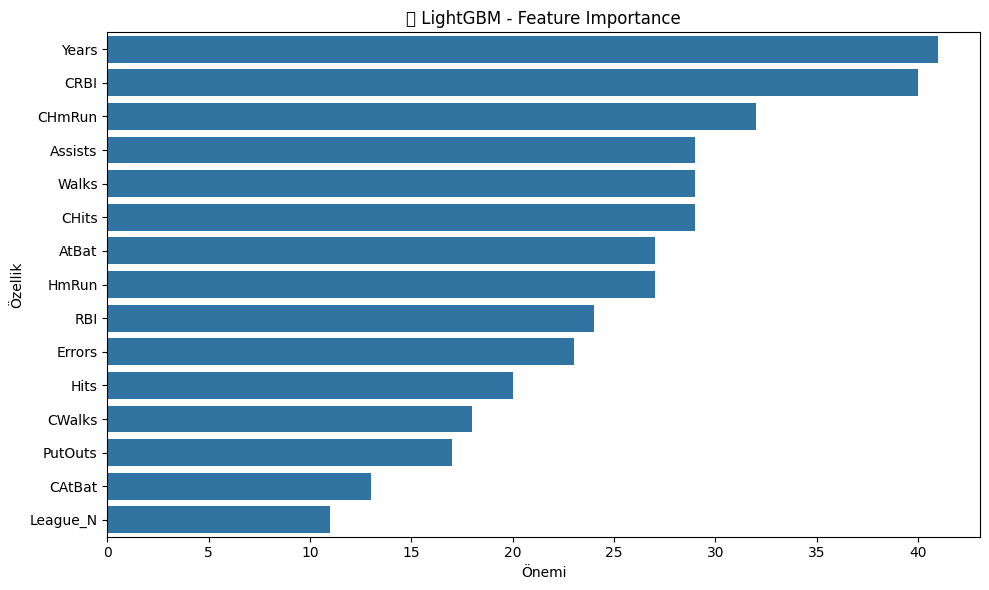

In [ ]:
### FEATURE IMPORTANCE: LIGHTGBM ###
importances = best_lgbm.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature')
plt.title('🔍 LightGBM - Feature Importance')
plt.xlabel('Önemi')
plt.ylabel('Özellik')
plt.tight_layout()
plt.show()




# After suppressing outliers, I found that Linear, Ridge, and Lasso models started to overfit. Before suppressing outliers, there was no overfitting.




---
📘 Linear Regression (Suppressed Data)

MAE: 233.1151

MSE: 122555.00

R²: 0.3612

🔁 Cross-Validation Sonuçları (on training set):
Average R²        : 0.2855

Average MAE       : 235.2025

Average RMSE      : 316.5288


---



📘 Ridge Regression (Suppressed Data)
📌 Ridge Coefficients:
[-261.54598925  223.01162573   18.14124417   -9.57013715    2.0350237
   92.08572282  -77.58331513 -243.23037186  223.88871807   34.70237117
  278.35207695  118.46725414 -163.98373473   47.15660159   35.76868204
  -19.39671731   29.31717773  -44.3634368   -11.15668199]
✅ Ridge Model (Best Alpha: 1.1514):

📉 Mean Squared Error (MSE): 119540.4719

📈 R² Skoru: 0.3769

📏 RMSE: 345.7463



🔁 Cross-Validation Results (On Train set ):

Average RMSE: 312.1650

Average R² : 0.3052
---


📘 Lasso Regression (Suppressed Data)

📌 Lasso Coefficients:

[-248.39176244  220.8522161     5.68166032   -0.            5.70266079
   83.08778031  -82.09399228   -0.            1.61341059   25.36083854
  255.6886616   121.86855108 -153.2277204    44.5194136    19.60892778
   -8.74709257   15.87644544  -44.71954744   -0.        ]

✅ Lasso Modeli (Best Alpha: 2.2230):

📉 Mean Squared Error (MSE): 116993.5249

📈 R² Skoru: 0.3902

📏 RMSE: 342.0432


🔁 Cross-Validation Results (On Train seti ):

Ortalama RMSE: 311.5882

Ortalama R² : 0.3121

---


✅ Best RandomForest parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

📊 Random Forest Test Sonuçları:

📉 MSE : 85637.75

📏 RMSE: 292.64

📈 R²  : 0.5544


🔁 Cross-Validation Results (Train seti):

Average RMSE: 279.5349

Average R² : 0.4808

---

✅ Best Gradient Boosting parametreleri: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

📊 Gradient Boosting Test Results:

📉 MSE : 100554.60

📏 RMSE: 317.10

📈 R²  : 0.4767

🔁 Cross-Validation results (On Train set):

Average RMSE: 274.8734

Average R² : 0.4941


---

✅ En iyi XGBoost parametreleri: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

📊 XGBoost Test Sonuçları:

📉 MSE : 111125.77

📏 RMSE: 333.36

📈 R²  : 0.4217

🔁 Cross-Validation Sonuçları (On Train set):

Average RMSE: 267.7195

Average R² : 0.5151

---

✅ En iyi LightGBM parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

📊 LightGBM Test Results:

📉 MSE : 96758.58

📏 RMSE: 311.06

📈 R²  : 0.4965

🔁 Cross-Validation Results (On Train set):

Ortalama RMSE: 269.4870

Ortalama R² : 0.5137


---

✅ En iyi CatBoost parameters: {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}

📊 CatBoost Test results:

📉 MSE : 101483.88

📏 RMSE: 318.57

📈 R²  : 0.4719


🔁 Cross-Validation results (Train seti):

Ortalama RMSE: 273.7664

Ortalama R² : 0.4989
---


en iyi sonucu lightGBM de aldık.